In [38]:
import matplotlib.pyplot as plt
import numpy as np

#Parameters:
r = 1e-2
k = 1e12
c1 = 5e-11
c2 = 1e-13
s0 = 7e5
d = 1e-3
ro = 1e-12
gama = 1e2
mi = 8
delta = 1e4 
alpha = 2e3
b = 5e6
lamb = 4.16


# Math Model
def mathModel(t, y):

    N = y[0]  #Cancer Cells
    I = y[1]  #Number of immune cells
    Q = y[2]  #Mass of chemotherapeutic agent in the bloodstream

    #VER AS FUNCÕES S(T) E Q(T) NO ARTIGO DEPOIS
    s = 10
    q = 5

    #ODE's
    dy = np.zeros(3)                                                          # N
    dy[0] = r*N*(1 - (N/k)) - c1*N*I - ((mi*N*Q)/(alpha+Q))                   # I
    dy[1] = s + s0 - d*I + ((ro*N*I)/(gama+N)) - c2*N*I - ((delta*I*Q)/(b+Q)) # Q
    dy[2] = q - lamb*Q 

    return dy

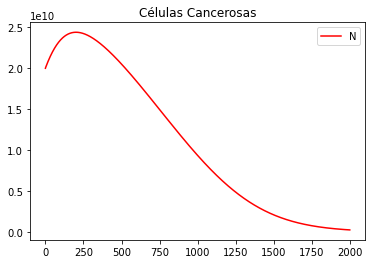

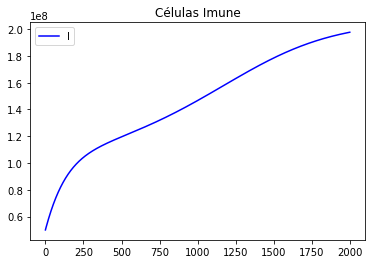

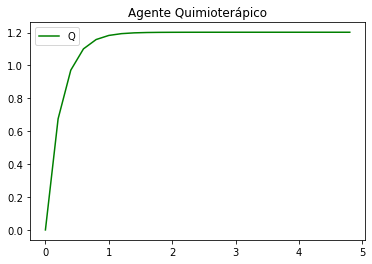

In [39]:
#Variaveis
t0 = 0 
tf = 2000
n  = 10001

# Calculando o dt
dt = (tf-t0)/(n-1)

# Vetor tempo
t = np.linspace(t0, tf, n)

# Condição inicial
a = np.zeros([n, 3])
a[0][0] = 2e10 # N
a[0][1] = 5e7  # I
a[0][2] = 0    # Q

# Runge Kutta 4ª ordem
for i in range(1, n):
  k1 = mathModel(t[i-1]     , a[i-1])
  k2 = mathModel(t[i]+dt/2.0, a[i-1]+(dt/2.0)*k1)
  k3 = mathModel(t[i]+dt/2.0, a[i-1]+(dt/2.0)*k2)
  k4 = mathModel(t[i]+dt    , a[i-1]+dt*k3)
  a[i] = dt*((k1+2.0*k2+2.0*k3+k4)/6.0) + a[i-1]
    
a = a.transpose()

# Gráficos
plt.plot(t, a[0], 'r', label='N')
plt.title("Células Cancerosas")
plt.legend(loc='best')
plt.show()

plt.plot(t, a[1], 'b', label='I')
plt.title("Células Imune")
plt.legend(loc='best')
plt.show()

plt.plot(t[:(int)(5/dt)], a[2][:(int)(5/dt)], 'g', label='Q')
plt.title("Agente Quimioterápico")
plt.legend(loc='best')
plt.show()

#plt.plot(t, a[1], 'b', label='I')
#plt.plot(t, a[0], 'r', label='N')
#plt.plot(t, a[2], 'g', label='Q')
#plt.title("Tudo junto")
#plt.legend(loc='best')
#plt.show()
